# Exercise sheet 4

**Please turin in your exercises by November 28.**

# Exercise sheet 2

## Angel Ontiveros, Björn Plüster
## 28.11.2023

## Task 1: L-smoothness

In the lecture we saw the importance of $L$-smoothness of a function and its relation to the step size. Determining the $L$ constant can be really hard and time consuming. Prove the following upper bound on the largest signular value of the matrix.

**Lemma**
For all matrices $A \in \mathbb{R}^{n\times m}$
$$
\|A\|_2 \leq \|A\|_F
$$
where $\|A\|_2$ is the spectral norm and $\|A\|_F$ is the Frobenius norm of matrix $A$.

**Proof**
The frobenius norm is submultiplicative, i.e. $\|AB\|_F \leq \|A\|_F \|B\|_F$ for all matrices $A$ and $B$. Therefore
$$
\|A\|_2 = \max_{x \neq 0} \frac{\|Ax\|_2}{\|x\|_2} \leq \max_{x \neq 0} \frac{\|Ax\|_F}{\|x\|_2} = \max_{x \neq 0} \frac{\|Ax\|_F}{\|x\|_F} = \|A\|_F
$$
$\square$



Using the lemma above, approximate the constant $L$ of the function
$$
f(x) = \|Ax - b\|_2^2
$$
for the given matrices $A$ and vectors $b$ below. What is the true $L$ constant of those matrices?

How much operations, in big-O notation, is needed to compute $\|A\|_2$ and how much to compute $\|A\|_F$?

In [2]:
import numpy as np
rng = np.random.default_rng(seed=0)

def f(x):
    return np.linalg.norm(A@x - b)**2

def f_prime(x):
    return 2*A.T@(A@x - b)

A = np.array([
    [ 1,  2,  0],
    [ 2,  2, -1],
    [ 2,  1,  1],
    [10,  0, -1],
    [ 0,  0, 10],
    [-1, -2, -1],
    [-3, -2, -1]
])
b = np.array([[1, 1, 1, 0, 0, 0, 0]])

# find the largest eigenvalue of A.T@A
L = np.max(np.linalg.eigvalsh(A.T@A))
print(f"L = {L}")

# find L via frobenius norm
L = np.linalg.norm(A, ord='fro')**2
print(f"L = {L}")

print(f"computing the spectral norm requires {A.shape[0] = } matrix-vector products")
print(f"computing the frobenius norm requires {A.shape[0]*A.shape[1] = } matrix-vector products")

L = 123.1189665839767
L = 241.00000000000003
computing the spectral norm requires A.shape[0] = 7 matrix-vector products
computing the frobenius norm requires A.shape[0]*A.shape[1] = 21 matrix-vector products


## Task 2: Running time

Gradient descent has a convergence rate of $O((1 - \frac{\mu}{L})^T)$ for strongly convex functions. Compare this to the convergence rate of the optimal method of $O((1 - \sqrt{\frac{\mu}{L}})^T)$. How many more iterations does gradient descent need as compared to the optimal method to achieve an approximate error of $\varepsilon$ for a function with condition number $Q_f := \frac{L}{\mu}$?

Plot the convergence rate over time for $Q_f = 10^4$ (assume big-O constanst are 1).

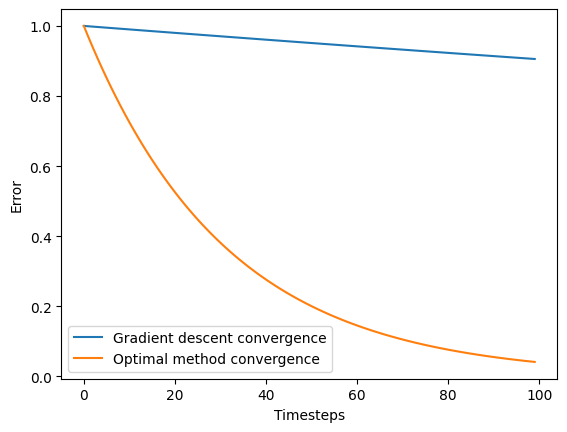

In [3]:
import matplotlib.pyplot as plt

q = 1000
def gd_convergence(t):
    return (1-(1/q))**t

def optimal_convergence(t):
    return (1-np.sqrt(1/q))**t

xs = np.arange(100)
y1 = list(map(gd_convergence, xs))
y2 = list(map(optimal_convergence, xs))

plt.plot(xs, y1, label="Gradient descent convergence")
plt.plot(xs, y2, label="Optimal method convergence")
plt.ylabel("Error")
plt.xlabel("Timesteps")
plt.legend()
plt.show()

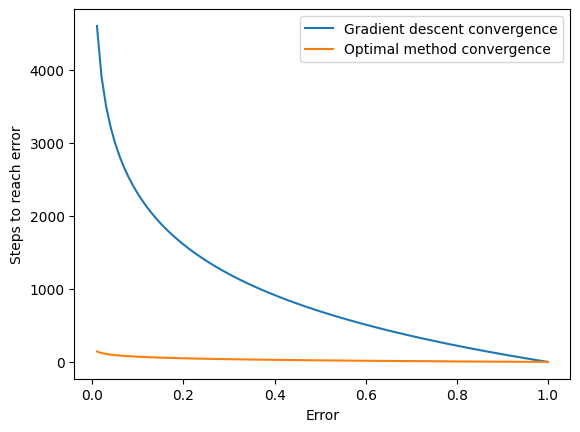

In [4]:
# How many iterations does it take for each convergence function to reach error e
def gd_steps_to_e(e):
    return np.log(e)/np.log(1-(1/q))

def optimal_steps_to_e(e):
    return np.log(e)/np.log(1-np.sqrt(1/q))

xs = np.linspace(0.01, 1, 100)
y1 = list(map(gd_steps_to_e, xs))
y2 = list(map(optimal_steps_to_e, xs))

plt.plot(xs, y1, label="Gradient descent convergence")
plt.plot(xs, y2, label="Optimal method convergence")
plt.ylabel("Steps to reach error")
plt.xlabel("Error")
plt.legend()
plt.show()

## Utilities

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [6]:
def contour_map(f, xb=(-1,1), yb=(-1,1), ax=None):
    if ax is None:
        ax = plt
    (nx, ny) = (45, 45)
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.contour(xv, yv, zv, 15)

def surface_plot(f, xb=(-1,1), yb=(-1,1)):
    (nx, ny) = (45, 45)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm)
    return fig, ax

In [7]:
def backtracking_line_search(x, d, f, g, alpha=0.3, beta=0.8):
    step_size = 1.
    while f(x + step_size * d) > f(x) + alpha * step_size * g(x).dot(d):
        step_size *= beta
    return step_size

def gradient_descent_path(x0, f, g, max_iter=100):
    xs = [x0]
    for _ in range(max_iter):
        step = backtracking_line_search(x0, -g(x0), f, g)
        x0 = x0 - step * g(x0)
        xs.append(x0)
    return xs

In [8]:
EXA = np.array([[30., 15],[-20, 25]])/20

EXAMPLES = [
    (lambda x: x.T@EXA@x + 1, lambda x: (EXA+EXA.T)@x, 0.5 * np.ones(2), (-1.,1.), (-1.,1.)),
    (lambda x: (x[0]**2 + 30 * x[1]**2 + 4 * x[0]), lambda x: np.array([2 * x[0] + 4, 60 * x[1]]), np.array([2.,3.]), (-2.5,2.5), (-1.5,3.5)),
    (lambda x: np.linalg.norm(np.sin(x*3))**2, lambda x: 6 * np.sin(x*3) * np.cos(x*3), np.array([.3,.5]), (-1.5, 1.), (-1.,1.))
]

def run_examples_heavy_ball():
    for (f, g, x0, xb, yb) in EXAMPLES:
        xs2 = heavy_ball_path(x0, f, g)
        xs2 = np.array(xs2)
        
        xs = gradient_descent_path(x0, f, g)
        xs = np.array(xs)

        contour_map(f, xb=xb, yb=yb)
        plt.plot(xs2[:,0], xs2[:,1], '.--k', label='heavy ball')
        plt.plot(xs[:,0], xs[:,1], '.--', color='gray', alpha=.5, label='gradient descent')
        plt.legend()
        plt.show()


def run_examples_nag():
    for (f, g, x0, xb, yb) in EXAMPLES:
        xs2 = nag_path(x0, f, g)
        xs2 = np.array(xs2)
        
        xs = gradient_descent_path(x0, f, g)
        xs = np.array(xs)

        contour_map(f, xb=xb, yb=yb)
        plt.plot(xs2[:,0], xs2[:,1], '.--k', label='nesterov')
        plt.plot(xs[:,0], xs[:,1], '.--', color='gray', alpha=.5, label='gradient descent')
        plt.legend()
        plt.show()

## Task 3: Polyak's heavy ball method

Implement Polyak's heavy ball method and the coresponding line search. **Standard backtracking line search is not usable here.**
* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`.

Function `heavy_ball_path` should return a list of vectors on the path to the minimum.

In [9]:
def nesterov_line_search(f, g, x, y, gamma_t, beta):
    gamma_t_minus_1 = gamma_t
    x_t = x - gamma_t*g(y)
    while f(x_t) > (f(y) + g(y).T@(x_t-y)+(1/(2*gamma_t))*np.linalg.norm(x_t - y)**2):
        gamma_t_minus_1 = gamma_t
        gamma_t = beta*gamma_t_minus_1
        x_t = y-gamma_t*g(y)
    return gamma_t

In [10]:
def heavy_ball_path(x0, f, g, max_iter=100):
    beta = 0.5
    gamma = 0.1
    vectors = [x0]
    xt_minus1 = x0
    xt = x0
    for i in range(max_iter):
        d = -g(xt) + beta*(xt - xt_minus1)
        gamma = nesterov_line_search(f,g,xt,d,gamma,beta)
        xt_minus1 = xt
        xt = xt + gamma*d
        vectors.append(xt)
    return vectors

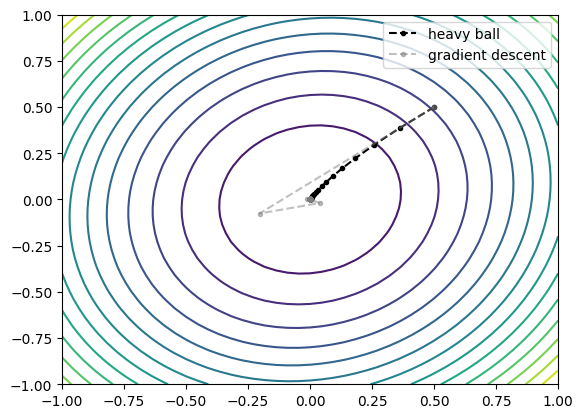

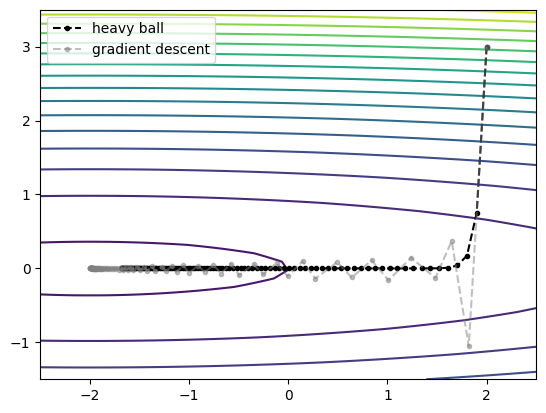

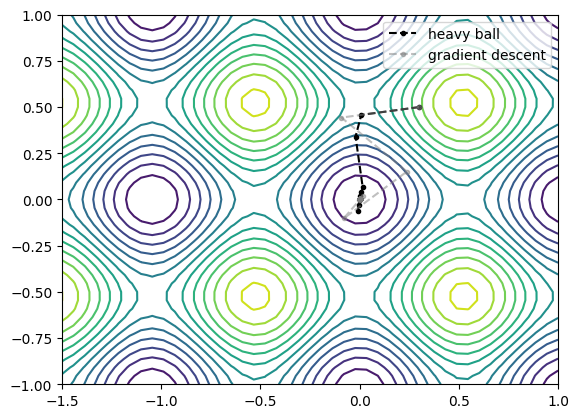

In [11]:
# run this to get plots
run_examples_heavy_ball()

## Task 4: Nesterov accelerated gradient method and backtracking line search

Implement Nesterov's accelerated gradient method and the coresponding line search. **Standard backtracking line search is not usable here.**

* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`.

Function `nag_path` should return a list of vectors on the path to the minimum.

In [12]:
def nag_path(x0, f, g, max_iter=100):
    gamma = 0.2
    vectors = [x0]
    xt_minus1 = x0
    xt = x0
    for i in range(max_iter):
        beta = (i-1)/(i+2)
        y = xt + beta*(xt - xt_minus1)
        gamma = nesterov_line_search(f,g,xt,y,gamma,beta)
        xt_minus1 = xt
        xt = y - gamma*g(y)
        vectors.append(xt)
    return vectors

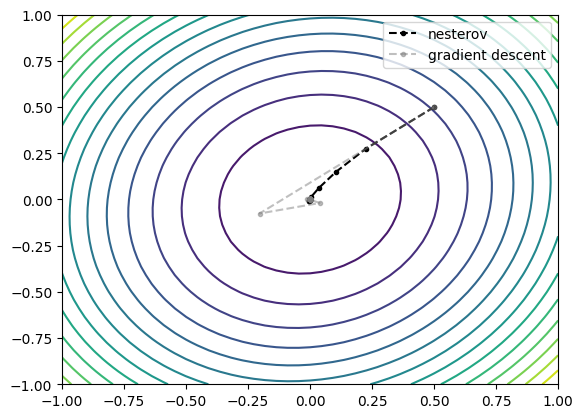

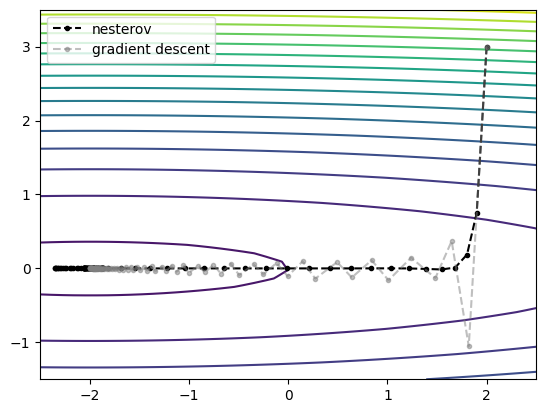

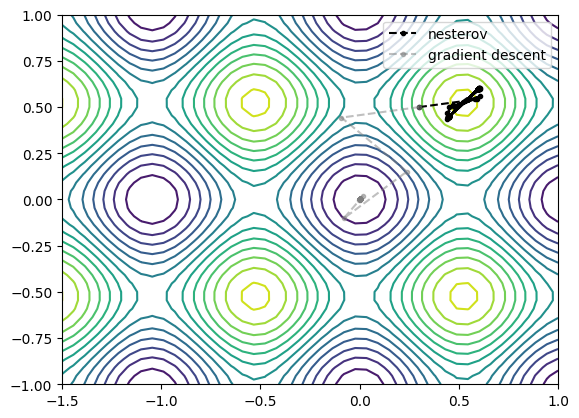

In [13]:
run_examples_nag()

## Task 5: Error plots

Compare and plot the error over time for the three methods on the following tasks.

### Simple quadratic function

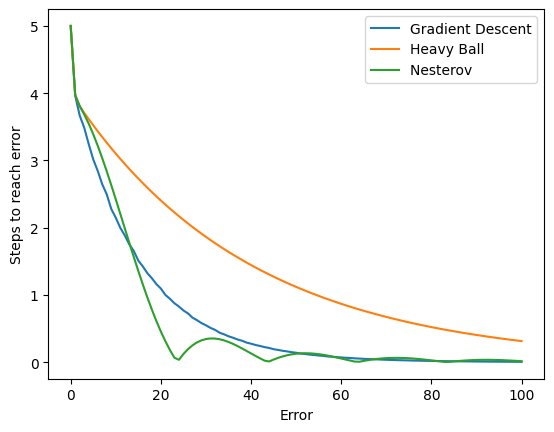

In [14]:
f = lambda x: (x[0]**2 + 30 * x[1]**2 + 4 * x[0])
g = lambda x: np.array([2 * x[0] + 4, 60 * x[1]])
x0 = np.array([2.,3.])

x_star = np.array([-2.,0.])

values_gd = gradient_descent_path(x0, f, g)
values_ball = heavy_ball_path(x0, f, g)
values_nag = nag_path(x0, f, g)

xs = np.arange(101)

plt.plot(xs, np.linalg.norm(x_star - values_gd, axis=1), label="Gradient Descent")
plt.plot(xs, np.linalg.norm(x_star - values_ball, axis=1), label="Heavy Ball")
plt.plot(xs, np.linalg.norm(x_star - values_nag, axis=1), label="Nesterov ")

plt.ylabel("Steps to reach error")
plt.xlabel("Error")
plt.legend()
plt.show()

### Linear regression

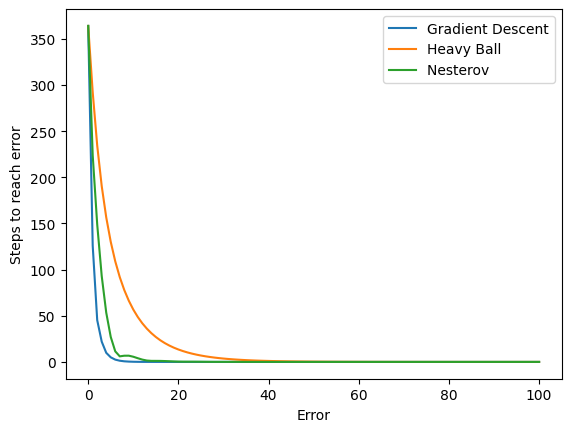

In [15]:
from sklearn.datasets import make_regression

def f(w):
    return np.linalg.norm(X @ w - y) ** 2 / len(X)

def g(w):
    return 2 * X.T @ (X @ w - y) / len(X)

X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)

x_star = np.linalg.lstsq(X, y, rcond=None)[0]

values_gd = gradient_descent_path(x0, f, g)
values_ball = heavy_ball_path(x0, f, g)
values_nag = nag_path(x0, f, g)

xs = np.arange(101)

plt.plot(xs, np.linalg.norm(x_star - values_gd, axis=1), label="Gradient Descent")
plt.plot(xs, np.linalg.norm(x_star - values_ball, axis=1), label="Heavy Ball")
plt.plot(xs, np.linalg.norm(x_star - values_nag, axis=1), label="Nesterov ")

plt.ylabel("Steps to reach error")
plt.xlabel("Error")
plt.legend()
plt.show()

### Logistic regression


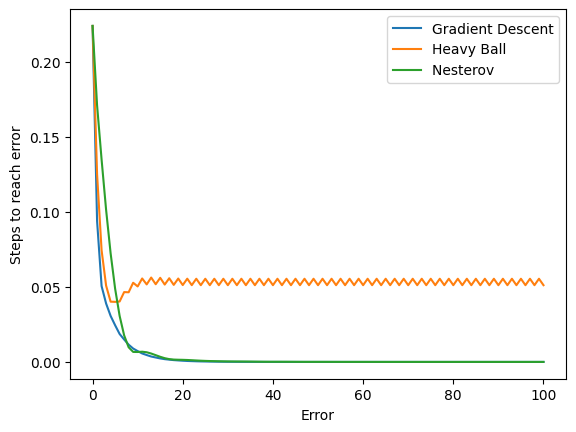

In [16]:
from sklearn.datasets import make_classification
from scipy.optimize import minimize

def f(w):
    return np.log(1. + np.exp(-y * X.dot(w))).mean() + np.linalg.norm(w)**2

def g(w):
    sig = np.exp(-y * X.dot(w))
    return 2*w - X.T.dot(sig * y / (sig + 1.)) / X.shape[0]

X, y = make_classification(1000, 80, n_informative=40,
#                               n_redundant=0,
                               n_clusters_per_class=2, flip_y=0.1, random_state=0)

x0 = np.zeros(80)
x_star = minimize(f, x0, jac=g).x

values_gd = gradient_descent_path(x0, f, g)
values_ball = heavy_ball_path(x0, f, g)
values_nag = nag_path(x0, f, g)

xs = np.arange(101)

plt.plot(xs, np.linalg.norm(x_star - values_gd, axis=1), label="Gradient Descent")
plt.plot(xs, np.linalg.norm(x_star - values_ball, axis=1), label="Heavy Ball")
plt.plot(xs, np.linalg.norm(x_star - values_nag, axis=1), label="Nesterov ")

plt.ylabel("Steps to reach error")
plt.xlabel("Error")
plt.legend()
plt.show()